<div style="text-align: center;background-color: yellow">
    <font color='black'</font>
    <h1>PRODIGY INFOTECH VIRTUAL INTERNSHIP</h1>
    <h1>PROJECT ONE</h1>
    <h1>(TASK NAME: TITANIC CLASSIFICATION)</h1>
</div>

## PROJECT OVERVIEW
- **Objective:** Build a Titanic Classification Model Using the Logistic Regression Model

- **Dataset:** [Link to my dataset](https://www.kaggle.com/competitions/titanic/data)


- **Submission Date:** December 10, 2023

- **Author:** SUNMOLA M.A _sunmolaadeyanju@gmail.com_

- **References**: [Youtube Resource](https://www.youtube.com/watch?v=xG-E--Ak5jg)

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 35px; display: inline; font-weight: bold;">STEP 1: DATA CLEANING & INITIAL EXPLORATION
</div>

1. Import necessary libraries
2. Load the dataset
3. Display a sample of the dataset
4. Explore the dataset's size and structure
5. Handle possible inconstencies with dataset structure accordingly
6. Check for data type consistency
7. Check for duplicates

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">**1.1 Import necessary libraries**</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">**1.2 Load the dataset**</span>

In [2]:
data = pd.read_csv("train.csv")

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">**1.3 Preview random sample of the dataset**</span>

In [3]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">**1.4 Explore dataset structure, size and contents**</span>

- Check the shape of the dataset
- Check general information about the structure of the dataset
- Check for missing values


In [4]:
#Checking the shape of the dataset
data.shape

(891, 12)

In [5]:
# Displaying information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.4 Inference</span>
</div>

- The train dataset contains 12 features with 891 records
- The 'Age', 'Cabin', and 'Embarked' columns contains two or more missing values

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">**1.5 Handling the found inconsistencies (i.e. null
values) with the dataset structures**</span>


- Drop the **Cabin** column
- Fill the **Age** column with mean value
- Fill the **Embarked** column with mode value
- Check for **Null Values** After Handling


In [7]:
# Dropping the "Cabin" column
data.drop(columns="Cabin", inplace=True)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [8]:
#Check the new dataset
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
332,333,0,1,"Graham, Mr. George Edward",male,38.00,0,1,PC 17582,153.4625,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,S


In [9]:
# Handling missing values in "Age" by filling with mean
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [10]:
# Handling missing values in "Embarked" by filling with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [11]:
#Checking for Null Values After Handling
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.5 Inference</span>
</div>

- Now, we can be sure that our dataset no longer contains a null value

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">
1.6 Checking for data type inconsistencies</span>

In [12]:
# Displaying Unique Data Types for Each Column
# First, create an empty dataframe to store the results
data_type= pd.DataFrame(columns=['COLUMN NAMES', 'UNIQUE DATA TYPES'])

# Secondly, iterate through columns and store unique data types in the new dataframe
for column_name in data.columns:
    unique_data_types = data[column_name].apply(type).unique()
    data_type = pd.concat([data_type, pd.DataFrame({'COLUMN NAMES': [column_name], 'UNIQUE DATA TYPES': [unique_data_types]})],ignore_index=True)

# Lastly, display the resulting table
print(data_type)

   COLUMN NAMES  UNIQUE DATA TYPES
0   PassengerId    [<class 'int'>]
1      Survived    [<class 'int'>]
2        Pclass    [<class 'int'>]
3          Name    [<class 'str'>]
4           Sex    [<class 'str'>]
5           Age  [<class 'float'>]
6         SibSp    [<class 'int'>]
7         Parch    [<class 'int'>]
8        Ticket    [<class 'str'>]
9          Fare  [<class 'float'>]
10     Embarked    [<class 'str'>]


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.6 Inference</span>
</div>

- It is satisfactory to know that each column contains unique data type
- Hence, there would not be need for type casting


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">
1.7 Check for and drop duplicates entries</span>

In [13]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">1.7 Inference</span>
</div>

- Good to know! The dataset has no duplicate rows

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 30px; display: inline; font-weight: bold;">STEP 2: EXPLORATORY DATA ANALYSIS +
DATA VISUALIZATION
</div>

1. Explore basic statistics of the data
2. Visually explore all of the dataset feature relationship
3. Visualize target distribution
4. Visualize Gender distribution
5. Visualize Social class distribution
6. Visualize Gender vs. Survival relationship
7. Visualize Social class vs. Survival relationship

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">
2.1 Displaying descriptive statistics of the data</span>

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.1 Inference</span>
</div>

- The mean age of passengers is approx 30yrs
- The mean fare amount is also 32
- The minimum and maximum vlaues for the 'PassengerId', 'survived', and 'Pclass' is a correct
indication that the features contain unique values as contained in the dataset metadata


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.2 Visually explore all of the dataset feature
relationship</span>

- With the aid of a pairplot
- With the aid of a heatmap


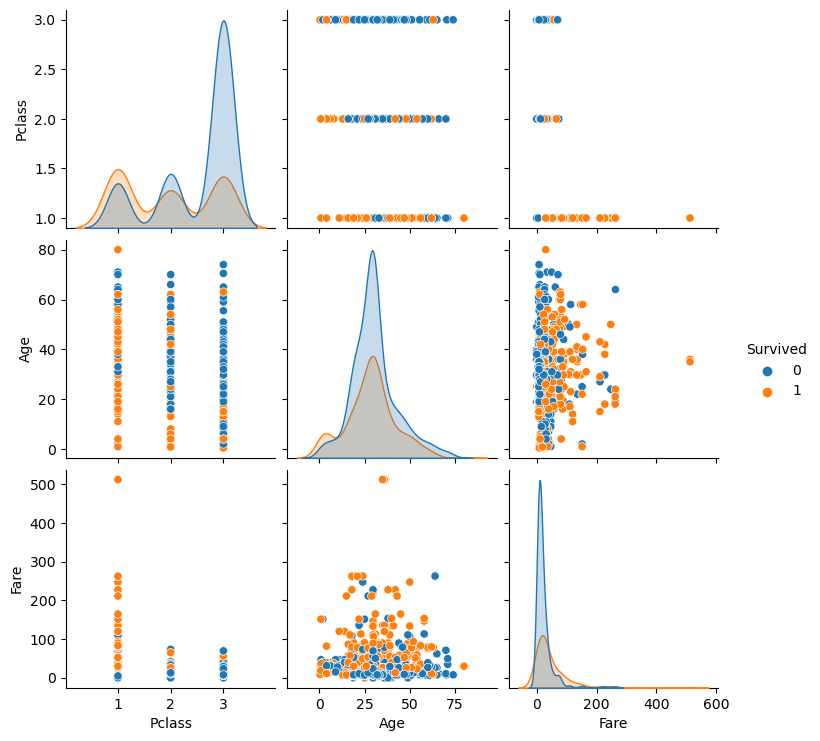

In [15]:
#Pairplot

sns.pairplot(data[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
#plt.title('Pairplot of Features')

C:\Users\msunmola\AppData\Local\Temp\ipykernel_21472\2997496438.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


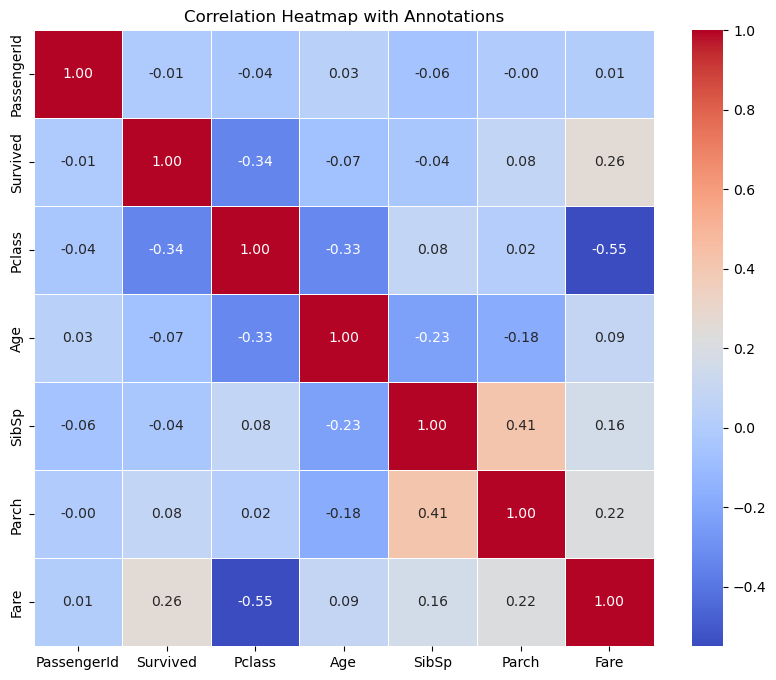

In [16]:
#Heatmap

# Create a heatmap with annotated correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap with Annotations')

# Show the plot
plt.show()

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.2 Inference</span>
</div>

- **'PassengerID'**, **'Name'**, **'Ticket'**, and **'Cabin'** seem not to have any causal
relationship/effect with/to the chances of survival


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.3 Visualize target (i.e. Survival) distribution</span>

- Display unique values for the 'Survival' column
- Using Pie Chart and Countplot

In [17]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

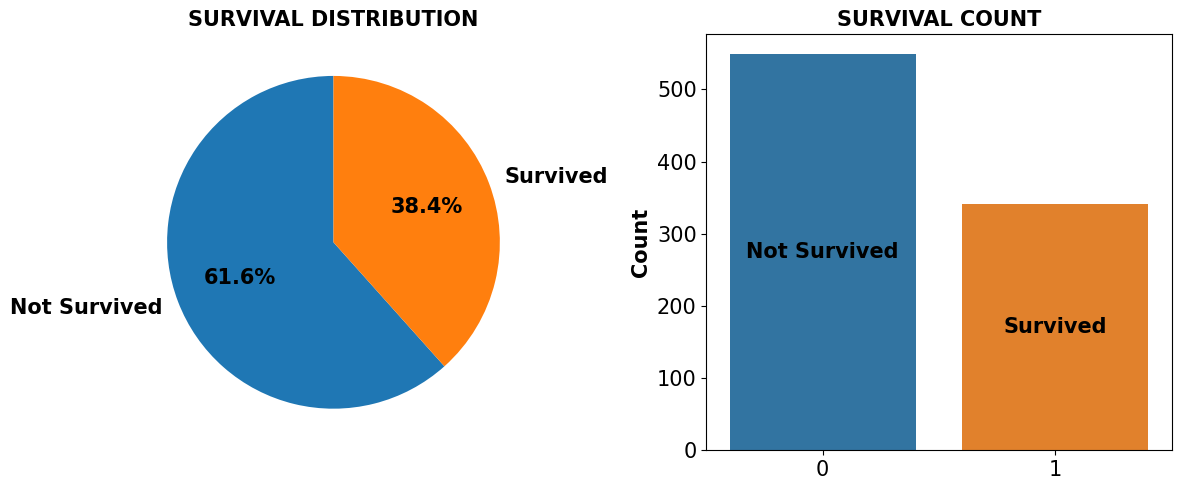

In [18]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
label_mapping = {data['Survived'].value_counts()[0]: 'Not Survived', data['Survived'].value_counts()[1]:'Survived'}
data['Survived_Label'] = data['Survived'].map(label_mapping)

# Pie chart
labels = ['Not Survived', 'Survived']
sizes = data['Survived'].value_counts()

axes[0].pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p), startangle=90, labeldistance=1.1, textprops={'fontsize': 15,'fontweight':'bold'})
axes[0].set_title('SURVIVAL DISTRIBUTION', fontweight='bold', fontsize=15)

# Countplot
sns.countplot(x='Survived', data=data, ax=axes[1])

axes[1].set_title('SURVIVAL COUNT')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Count', fontsize=15, fontweight='bold')

# Annotate the bars with labels
for p in axes[1].patches:
 label = label_mapping[p.get_height()]
 axes[1].text(p.get_x() + p.get_width() / 2., p.get_height() / 2, label, ha='center', va='center', fontweight='bold', color='black', fontsize=15)

data.drop(columns='Survived_Label', inplace=True)          
axes[1].set_title('SURVIVAL COUNT', fontweight='bold', fontsize=15)
              
# Adjust layout
plt.tight_layout()
              
# Show the plots
plt.show()

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.4 Visualize Gender distribution</span>
- Display unique values for the 'Sex' column
- Using Pie Chart and Countplot


In [19]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

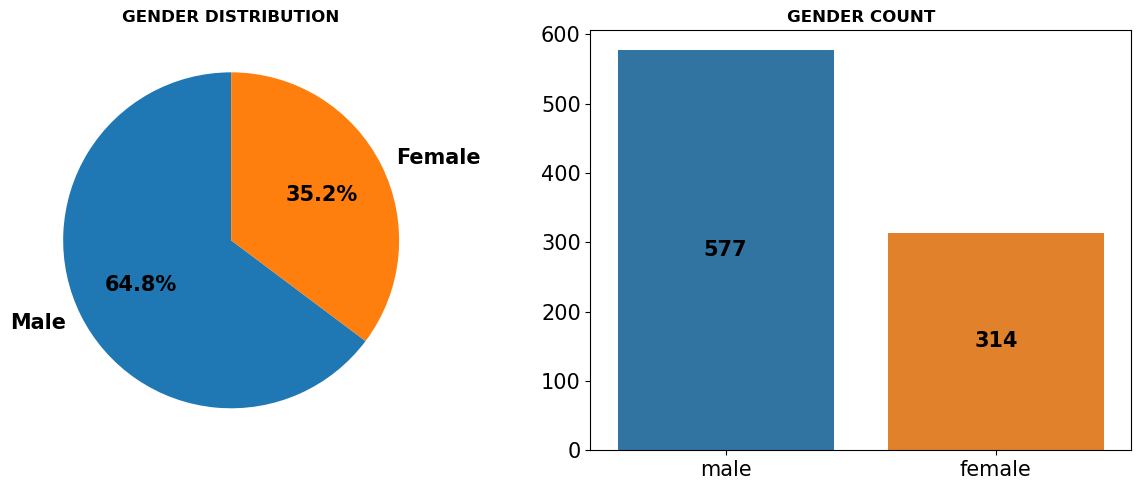

In [20]:
# Map numeric values to labels for the "Sex" column
label_mapping_sex = {'male': 'Male', 'female': 'Female'}
data['Sex_Label'] = data['Sex'].map(label_mapping_sex)

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for "Sex" column
labels_sex = ['Male', 'Female']
sizes_sex = data['Sex'].value_counts()

axes[0].pie(sizes_sex, labels=labels_sex, autopct="%.1f%%", startangle=90, textprops={'fontsize': 15,'fontweight':'bold'})
axes[0].set_title('GENDER DISTRIBUTION', fontweight='bold')

# Countplot for "Sex" column with labels at the center of the bars
sns.countplot(x='Sex', data=data, ax=axes[1])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('')

# Annotate the bars with count labels at the center
for p in axes[1].patches:
    label = f"{int(p.get_height())}"  # Get the count as an integer
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height() / 2, label,
                 ha='center', va='center', fontweight='bold', color='black', fontsize=15)

data.drop(columns='Sex_Label',inplace=True)
axes[1].set_title('GENDER COUNT', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.5 Visualize Social Class Distribution</span>
- Display unique values for the 'Pclass' column
- Using Pie Chart and Countplot

In [21]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

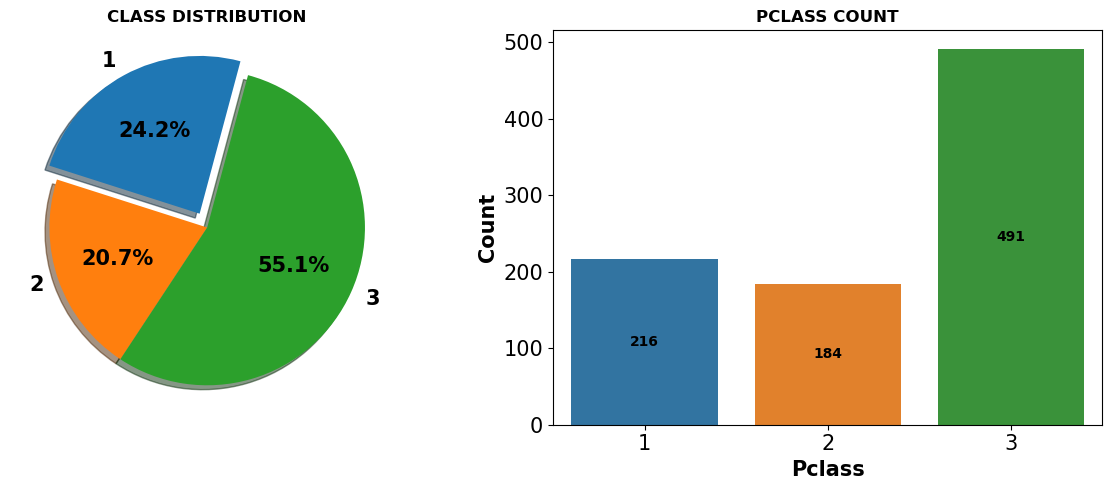

In [22]:

# Map numeric values to labels for the "Pclass" column
label_mapping_pclass = {1: 'Class 1', 2: 'Class 2', 3: 'Class 3'}
data['Pclass_Label'] = data['Pclass'].map(label_mapping_pclass)

# Create a 1x2 subplot grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for 'Pclass'
sizes_pclass = data['Pclass'].value_counts().sort_index().values
explode_pclass = (0.1, 0, 0)
axes[0].pie(sizes_pclass, explode=explode_pclass, labels=label_mapping_pclass, autopct='%1.1f%%', startangle=75,shadow=True,textprops={'fontsize': 15,'fontweight':'bold'})
axes[0].set_title('CLASS DISTRIBUTION',fontweight='bold')

# Countplot for 'Pclass'
sns.countplot(x='Pclass', data=data, ax=axes[1])

axes[1].set_title('SURVIVAL COUNT')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Pclass', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')
axes[1].set_title('PCLASS COUNT', fontweight='bold')

# Annotate the bars with count labels at the center
for p in axes[1].patches:
    label = f"{int(p.get_height())}"  # Get the count as an integer
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height() / 2, label,
                 ha='center', va='center', fontweight='bold', color='black')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

data.drop(columns='Pclass_Label', inplace=True)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.6 Visualize Gender Vs. Survival relationship</span>

<Axes: xlabel='Sex', ylabel='count'>

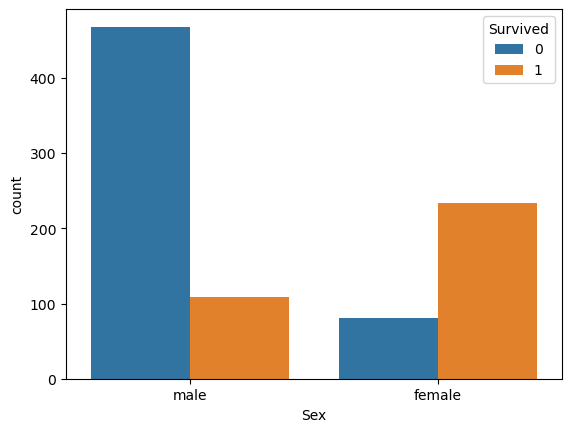

In [23]:
sns.countplot(x='Sex', hue='Survived', data=data)

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.6 Inference</span>
</div>

- Very few percentage of male who boarded the ship survived
- More female passagers tends to have survived the wreck

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">2.7 Visualize Social Class Vs. Survival relationship</span>

Text(0, 0.5, 'Count')

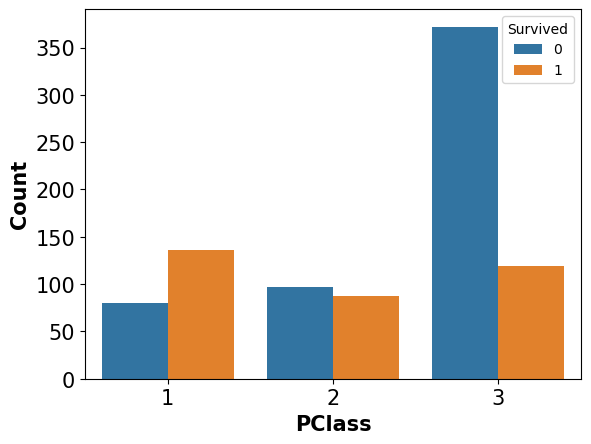

In [24]:
sns.countplot(x='Pclass', hue='Survived', data=data)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('PClass', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">2.7 Inference</span>
</div>

- Passenger's social class status tends to have a direct correlation with their chances of survival
- A greater percentage of lower social class passengers did not make it alive from the ship wreck


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 30px; display: inline; font-weight: bold;"> STEP 3: DATA PREPROCESSING
</div>
    
1. Preview few samples of the data
2. Feature Engineering
3. Feature selection
4. Train Test Split

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.1 Preview the Data</span>

In [25]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.2 Feature Engineering</span>

In [26]:
#Encode male and female values in the 'Sex' column as 0 and 1 respectively
#Similarly, encode C, Q, & S values in the 'Embarked' column as 0, 1, and 2 respectively

data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'C': 0, 'Q':1, 'S':2}}, inplace=True)

#Check to affirm changes
data.sample(2)
             

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
585,586,1,1,"Taussig, Miss. Ruth",1,18.0,0,2,110413,79.65,2
491,492,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,2


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.3 Feature Selection</span>

In [27]:
#Split the dataset into target and features for model training purposes

X=data.drop(columns=['PassengerId','Survived', 'Name', 'Ticket'], axis=1) #feature
y=data['Survived'] #target

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">3.4 Train Test Split</span>

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 30px; display: inline; font-weight: bold;">STEP 4: MODEL BUILDING & EVALUATION
</div>
    
    
1. Develop a Logistic Regression Model
2. Train the model on the 'training' dataset
3. Evalaute the model performance on the training dataset
4. Train the model on the 'test' dataset
5. Evalaute the model performance on the testing dataset
6. Finally, submit your predictions on the Kaggle dataset to evaluate model overall
performance

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">4.1 Build the model</span>

In [29]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

C:\Users\msunmola\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">4.2 Training the model on the Train Dataset</span>

In [30]:
y_hat = LR_model.predict(X_test)
y_hat

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">4.3 Model Evaluation</span>

In [31]:
LRmodel_accuracy = accuracy_score(y_test, y_hat)
LRmodel_precision = precision_score(y_test, y_hat)
LRmodel_ConfMatrix = confusion_matrix(y_test, y_hat)

Model_Evaluation=pd.DataFrame({'TrainingSet Accuracy':[LRmodel_accuracy], 'TrainingSet Precision':[LRmodel_precision]})
Model_Evaluation = Model_Evaluation.style.format({'TrainingSet Accuracy': '{:.2%}','TrainingSet Precision': '{:.2%}'})
                               
Model_Evaluation

,TrainingSet Accuracy,TrainingSet Precision
0,78.77%,84.75%


<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">4.4 & 4.5 Train & Evaluate model performance on the
test dataset
 </span>

In [32]:
# Load the test data
test_data = pd.read_csv("test.csv")

# Drop unnecessary columns
test_data.drop(columns="Cabin", inplace=True)

# Fill missing values
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# Map categorical values to numeric
test_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'C': 0, 'Q': 1, 'S':2}}, inplace=True)
                                                                 
# Extract features for prediction
X_test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)
                                                                 
# Use the trained model to make predictions
test_predictions = LR_model.predict(X_test_data)

test_predictions


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<span style="background-color: yellow; padding: 5px;font-size: 20px; display: inline;font-weight: bold;">4.6 Evaluate model overall performance via Kaggle metric score
 </span>
 
- Create a prediction based on the test dataset
- Create a submission file in csv
- Submit your predictions on Kaggle competition

In [33]:
# Create a DataFrame with PassengerId and corresponding predictions
submission_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived':test_predictions})
                              
# Save the predictions to a CSV file                              
submission_df.to_csv('submission.csv', index=False)
submission_df.sample(7)

,PassengerId,Survived
234,1126,0
302,1194,0
230,1122,0
286,1178,0
86,978,1
320,1212,0
11,903,0


<div style="text-align: center;">
    <span style="background-color: yellow; padding: 5px; font-size: 20px; display: inline; font-weight: bold;">4.6 Inference</span>
</div>

- Upon submitting my submission.csv file on Kaggle competion, I got a metric score of
0.77033
- This implies that my model got approximately 77% predictions correctly.
- **THAT's A BIT IMPRESSING**
